17


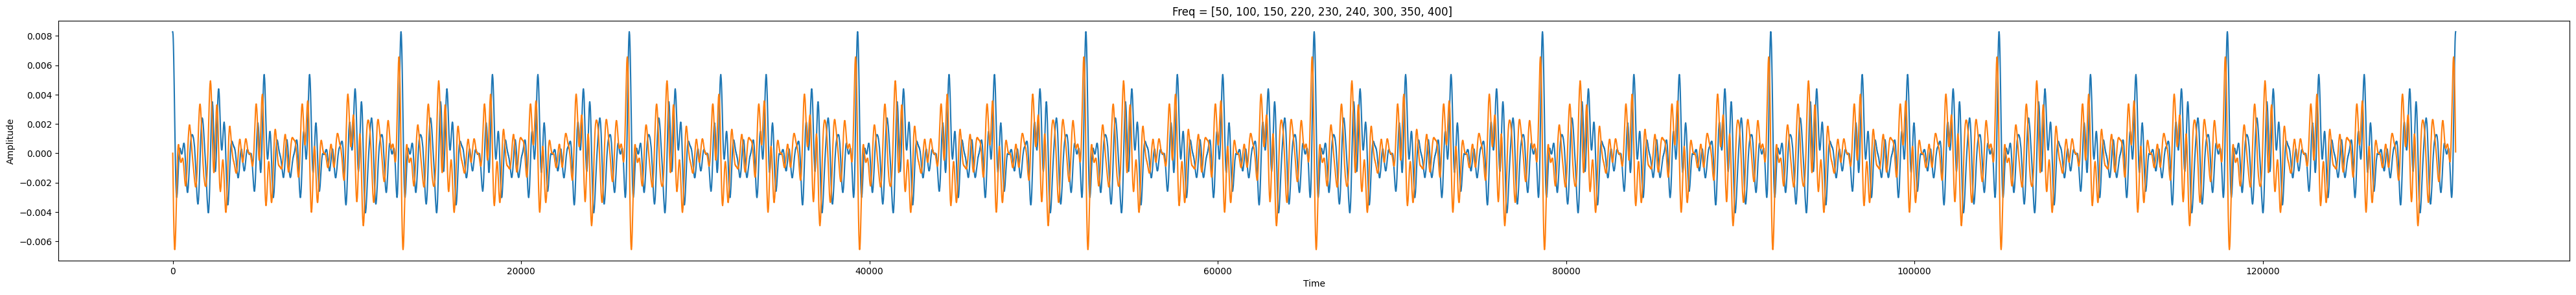

In [11]:
import pennylane as qml
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.io.wavfile import write

def generate_mono_channel_audio(freq, samples, global_phase, title, plot_graph=True):
    wires = int(np.log2(samples)) + 1
    dev = qml.device('lightning.qubit', wires=wires)
    print (wires)
    @qml.qnode(dev)
    def circuit():
        amp = np.zeros(2**wires)
        for f in freq:
            amp[f] = 1
        amp = amp / np.linalg.norm(amp)
        qml.AmplitudeEmbedding(amp, wires=range(wires))
        qml.adjoint(qml.QFT(wires=range(wires)))
        
        if global_phase:
            qml.PauliX(0)
            qml.PhaseShift(global_phase, wires=0)
            qml.PauliX(0)
            qml.PhaseShift(global_phase, wires=0)
            
        return qml.state()

    state = circuit()
    real_amplitudes = np.round(np.real(state), 5)
    img_amplitudes = np.round(np.imag(state), 5)

    plt.figure().set_figwidth(50)
    plt.plot(range(len(real_amplitudes)), real_amplitudes)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.plot(range(len(real_amplitudes)), img_amplitudes)
    plt.title('Freq = '  +str(freq) + " " + title)
    plt.show()
    # qml.draw_mpl(circuit)()
    return real_amplitudes

frequencies = [50,100, 150, 220, 230, 240, 300, 350,400]

buffer = generate_mono_channel_audio(frequencies, 88100, 0, "", False)*220
rate = 44100 

write('freq_'+'-'.join([str(i) for i in frequencies])+".wav", rate, np.round(buffer * 32767).astype(np.int16))

